# Appendix B.3 - Statistics and Probability

Statistics is about gaining information from sets of data. Sometimes we want to represent a lot of complicated information from a large data set in a way that is easily understood. Probability Theory is a branch of mathematics concerned with the analysis of random phenomena. Statistics is intimately linked to Probability theory, we can use statistics to work out the probability, the chance, that a certain event will occur. [Here](https://www.youtube.com/watch?v=arJxFjaMsBM&t=1s) a short video with the explanations.

![](images/stat-prob-difference.png)

Pandas comes with a wide variety of statistical functions.

## Statistics

One obvious description of any dataset is simply the data. For a small enough dataset, this might even be the best description. But for a larger dataset, this is unwieldy and probably opaque. For that reason, we use statistics to distill and communicate relevant features of our data.

Suppose we have an array of n numbers

$[ x_0, x_1, ..., x_n]$

For example, the number of friends for each user in a social network like application.

In [76]:
import pandas as pd
num_friends = pd.Series([100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

As a first approach, we can put our date into a **histogram**

Text(0, 0.5, 'Number of people')

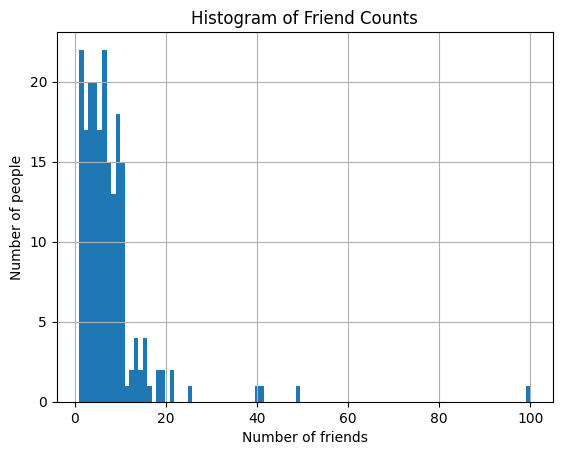

In [77]:
ax = num_friends.hist(bins=100)
ax.set_title("Histogram of Friend Counts")
ax.set_xlabel("Number of friends")
ax.set_ylabel("Number of people")

Unfortunately, this chart is still too difficult to slip into conversations. So
you start generating some **statistics**. Probably the simplest statistic is the
number of data points.

In [78]:
num_friends.count()


204

We can probably also interested in the largest and smallest values

In [79]:
largest_value = num_friends.max()
smallest_value = num_friends.min()

print(largest_value)
print(smallest_value)

100.0
1.0


### Central Tendencies

Usually, we’ll want some notion of where our data is centered. Most commonly we’ll use the **mean (or average)**, which is just the sum of the data divided by its count:

$\displaystyle \mu= \frac{1}{n}\sum_{i=0}^n x_i$

In [80]:
num_friends.mean()


7.333333333333333

If you have two data points, the mean is simply the point halfway between them. As you add more points, the mean shifts around, but it always depends on the value of every point. 

We’ll also sometimes be interested in the **median**, which is the middle-most value (if the number of data points is odd) or the average of the two middle-most values (if the number of data points is even). Of course, data should be sorted.

$\displaystyle \text{n is odd: } x_{median}=x_{\frac{n-1}{2}}$

$\displaystyle \text{n is even: } x_{median}=\frac{x_\frac{n-2}{2}+x_\frac{n}{2}}{2}$

Notice that (unlike the mean) the median doesn’t fully depend on every value in your data. For example, if you make the largest point larger (or the smallest point smaller), the middle points remain unchanged, which means so does the median.

In [81]:
num_friends.median()

6.0

Clearly, the mean is simpler to compute, and it varies smoothly as our data changes. If we have n data points and one of them increases by some small amount e, then necessarily the mean will increase by e/n. This makes the mean amenable to all sorts of calculus tricks. In order to find the median, however, we have to sort our data. And changing one of our data points by a small amount might increase/decrease the median by a small amount or not at all (depending on the rest of the data).

At the same time, the mean is very sensitive to outliers in our data. If our friendliest user had 200 friends (instead of 100), then the mean would rise to 7.82, while the median would stay the same. If outliers are likely to be bad data (or otherwise unrepresentative of whatever phenomenon we’re trying to understand), then the mean can sometimes give us a misleading picture. 

A generalization of the median is the **quantile**, which represents the value under which a certain percentile of the data lies (the median represents the value under which 50% of the data lies).

In [82]:
num_friends.quantile(0.75)


9.0

Less commonly you might want to look at the **mode**, or most common value

In [83]:
num_friends.mode()


0    1.0
1    6.0
dtype: float64

### Dispersion

Dispersion refers to measures of how spread out our data is. Typically values near zero signify not spread out at all, large values (whatever that means) signify very spread out. For instance, a very simple measure is the **range**, which is just the difference between the largest and smallest elements.

In [84]:
def range_series(series):
    return series.max() - series.min()

range_series(num_friends)

99.0

The range is zero precisely when the max and min are equal, which can only happen if the elements are all the same, which means the data is as undispersed as possible. Conversely, if the range is large, then the max is much larger than the min and the data is more spread out. Like the median, the range doesn’t really depend on the whole dataset. A dataset whose points are all either 0 or 100 has the same range as a dataset whose values are 0, 100, and lots of 50s. But it seems like the first dataset
“should” be more spread out.

A more complex measure of dispersion is the **variance**. The variance is the average of the squared differences from the mean. In other words, it is a measure of how far each value is far from the mean:

$\displaystyle \sigma^2=\frac{1}{n}\sum_{i=0}^n(x_i-\mu)^2$

In [85]:
num_friends.var()

81.54351395730707

Now, whatever units our data is, all of our measures of central tendency are in that same unit. The range will similarly be in that same unit. The variance, on the other hand, has units that are the square of the original units. As it can be hard to make sense of these, we often look instead at the **standard deviation**:

$\displaystyle \sigma=\sqrt{\frac{1}{n}\sum_{i=0}^n(x_i-\mu)^2}$

In [86]:
num_friends.std()

9.030144736232474

Both the range and the standard deviation have the same outlier problem that we saw earlier for the mean. Using the same example, if our friendliest user had instead 200 friends, the standard deviation would be 14.89, more than 60% higher!

A more robust alternative computes the difference between the 75th percentile value and the 25th percentile value, which is quite plainly unaffected by a small number of outliers.

In [87]:
def interquartile_range(series):
    return series.quantile(0.75) - series.quantile(0.25)

interquartile_range(num_friends)

6.0

### Correlation

Often, we are interested to investigate the relationship between two datasets. Suppose we have a new list of numbers:

$[ y_0, y_1, ..., y_n]$

For example, it can shows how many minutes per day each user spends on a site, and you’ve ordered it so that its elements correspond to the elements of our previous list. We can be interested in investigating if the amount of time people spend on the site is related to the number of friends they have on the site.

In [88]:
daily_minutes = pd.Series([1, 68.77, 51.25, 52.08, 38.36, 44.54, 57.13, 51.4, 41.42, 31.22, 34.76, 54.01, 38.79, 47.59, 49.1, 27.66, 41.03, 36.73, 48.65, 28.12, 46.62, 35.57, 32.98, 35, 26.07, 23.77, 39.73, 40.57, 31.65, 31.21, 36.32, 20.45, 21.93, 26.02, 27.34, 23.49, 46.94, 30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21, 26.61, 29.77, 20.59, 27.53, 13.82, 33.2, 25, 33.1, 36.65, 18.63, 14.87, 22.2, 36.81, 25.53, 24.62, 26.25, 18.21, 28.08, 19.42, 29.79, 32.8, 35.99, 28.32, 27.79, 35.88, 29.06, 36.28, 14.1, 36.63, 37.49, 26.9, 18.58, 38.48, 24.48, 18.95, 33.55, 14.24, 29.04, 32.51, 25.63, 22.22, 19, 32.73, 15.16, 13.9, 27.2, 32.01, 29.27, 33, 13.74, 20.42, 27.32, 18.23, 35.35, 28.48, 9.08, 24.62, 20.12, 35.26, 19.92, 31.02, 16.49, 12.16, 30.7, 31.22, 34.65, 13.13, 27.51, 33.2, 31.57, 14.1, 33.42, 17.44, 10.12, 24.42, 9.82, 23.39, 30.93, 15.03, 21.67, 31.09, 33.29, 22.61, 26.89, 23.48, 8.38, 27.81, 32.35, 23.84])

We’ll first look at **covariance**, the paired analogue of variance. Whereas variance measures how a single variable deviates from its mean, covariance measures how two variables vary in tandem from their means.

$\displaystyle cov_{x,y}=\frac{\sum_{i=1}^{n}(x_{i}-\mu_x)(y_{i}-\mu_y)}{n}$

In [89]:
num_friends.cov(daily_minutes)

22.425435139573054

When corresponding elements of x and y are either both above their means or both below their means, a positive number enters the sum. When one is above its mean and the other below, a negative number enters the sum. Accordingly, a large positive covariance means that x tends to be large when y is large and small when y is small. A large negative covariance means the opposite, x tends to be small when y is large and vice versa. A covariance close to zero means that no such relationship exists.

However, this number can be hard to interpret, for a couple of reasons: its units are the product of the inputs’ units, which can be hard to make sense of; if each user had twice as many friends (but the same number of minutes), the covariance would be twice as large. But in a sense, the variables would be just as interrelated. Said differently, it’s hard to say what counts as a “large” covariance.

For this reason, it’s more common to look at the **correlation**, which divides out the standard deviations of both variables. It is unitless and always lies between –1 (perfect anticorrelation) and 1 (perfect correlation).

$\displaystyle  corr_{x,y} = \frac{\sum_{i=1}^{n}(x_i - \mu_x)(y_i - \mu_y)}{n \sigma_{x} \sigma_{y}}$

In [90]:
num_friends.corr(daily_minutes)

0.247369573664782

A number like 0.25 represents a relatively weak positive correlation.

### Outliers

However, one thing we neglected to do was examine our data.

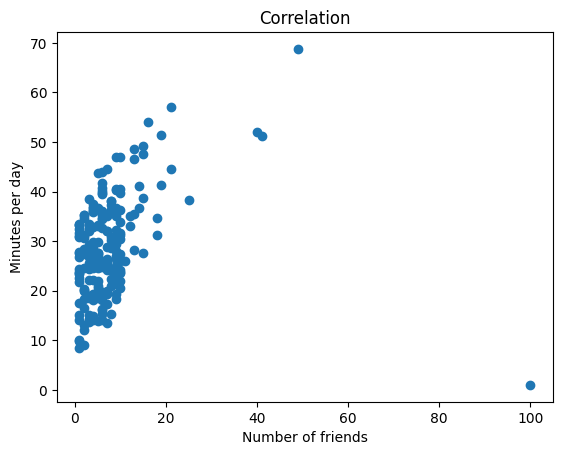

In [91]:
import matplotlib.pyplot as plt

plt.scatter(num_friends, daily_minutes)
plt.title("Correlation")
plt.xlabel("Number of friends")
plt.ylabel("Minutes per day")
plt.show()

The person with 100 friends (who spends only 1 minute per day on the site) is a huge **outlier**, and correlation can be very sensitive to outliers. What happens if we ignore him?

In [92]:
num_friends_good = num_friends.drop(num_friends.index[0])
daily_minutes_good = daily_minutes.drop(daily_minutes.index[0])

num_friends_good.corr(daily_minutes_good)

0.5736792115665574

Without the outlier, there is a much stronger correlation!

A correlation of zero indicates that there is no **linear** relationship between the two variables. However, there may be **other sorts of relationships**. For example, the following data have zero correlation.

In [93]:
x = pd.Series([-2, -1, 0, 1, 2])
y = pd.Series([ 2, 1, 0, 1, 2])

x.corr(y)

0.0

They certainly have a relationship (each element of y equals the absolute value of the corresponding element of x). What they don’t have is a relationship in which knowing how x compares to mean(x) gives us information about how y compares to mean(y).

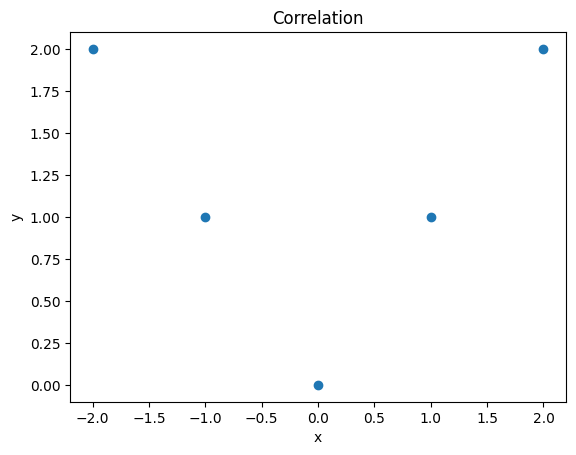

In [94]:
plt.scatter(x, y)
plt.title("Correlation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Finally, notice that **correlation is not causation**: if x and y are strongly correlated, that might mean that x causes y or that y causes x, but also that some third factor causes both, or nothing at all.

## Simpson Paradox

One not uncommon surprise when analyzing data is **Simpson paradox**, which occurs when trends that appear when a dataset is separated into groups reverse when the data are aggregated, [here an exmaple](https://towardsdatascience.com/simpsons-paradox-how-to-prove-two-opposite-arguments-using-one-dataset-1c9c917f5ff9). 

![](images/stat-prob-simpson.png)

For example, think of labels as x=hours spent watching TV per month, y: test score, group: age in years. In this case, modeling the whole dataset makes it look like that watching more TV is related to higher test scores. However, modeling each group separately reveals that older kids score higher, but watching more TV is related to lower scores. 

In general, the paradox occurs because a third variable can affect the relationship between a pair of variables. Statisticians refer to this type of third variable as a **confounder or confounding variable**. To understand the correct relationship between two variables, you must factor in the influence of confounders. The only way to avoid this is by **knowing data** and by doing what we can to make sure we’ve checked for possible confounding factors. Obviously, this is not always possible.

Simpson’s Paradox is important because it reminds us that the data we get are not all the data there is. We can’t be satisfied only with the numbers or a figure, we have to consider the **data generation process** responsible for the data. Once we understand the mechanism producing the data, we can look for other factors influencing a result that are not on the plot. **Thinking causally** is critical to prevent us from drawing faulty conclusions from numbers. We can use experience and domain knowledge in addition to data to make better decisions.

## Probability Theory

For our purposes, we can think of probability as a way of
quantifying the **uncertainty** associated with **events** chosen from some **universe of events**.  Think of rolling a die: the universe consists of all possible outcomes and any subset of these outcomes is an event (the die rolls a 4). Notationally, we write P(E) to mean the probability of the
event E.

We use probability theory to build and evaluate models. 

### Dependence and independence

We say that two events E and F are **dependent** if knowing something about whether E happens gives us information about whether F happens (and vice versa). Otherwise, they are **independent**.

For instance, if we flip a fair coin twice, knowing whether the first flip is heads gives us no information about whether the second flip is heads. These events are independent. On the other hand, knowing whether the first flip is heads certainly gives us information about whether both flips are tails (if the first flip is heads, then definitely it’s not the case that both flips are tails). These two events are dependent.

Mathematically, two events E and F are independent if the probability that they both happen is the product of the probabilities that each one happens:

$P(E,F)=P(E)P(F)$

### Conditional Probability

If two events E and F are not independent (and if the probability of F is not zero), we define the probability of E **conditional on** F as:

$\displaystyle P(E|F) = \frac{P(E,F)}{P(F)}$

We can think of this as the probability that E happens, given that we know that F happens. When E and F are independent, we can check that this gives P(E|F)=P(E) which is the mathematical way of expressing that knowing F occurred gives us no additional information about whether E occurred.

We often rewrite this as:

$\displaystyle P(E,F) = \frac{P(E|F)}{P(F)}$

[Here](https://www.nagwa.com/en/videos/183106462819/) a short video on this topic.

### Bayes's Theorem

The Bayes's Theorem is a way of "reversing" conditional probabilities. Let’s say we need to know the probability of some event E conditional on some other event F occurring. But we only have information about the probability of F conditional on E occurring.

$\displaystyle P(E|F) = \frac{P(F|E)P(E)}{P(F)}$

The theorem may be derived from the definition of conditional probability:

$\displaystyle P(E|F) = \frac{P(E,F)}{P(F)}$

$\displaystyle P(F|E) = \frac{P(F,E)}{P(E)}$

but $P(E,F) = P(F,E)$ and dividing

$\displaystyle \frac{P(E|F)}{P(F|E)} = \frac{P(E)}{P(F)}$

and so

$\displaystyle P(E|F) = \frac{P(F|E)P(E)}{P(F)}$

### Discrete Random Variables

A random variable is a variable whose possible values have an associated **probability distribution**, which gives the probabilities that the variable realizes each of its possible values.More formally, a discrete random variable X takes on values x with probability p(x) following its **probability mass function (pmf)**:

$\displaystyle p(x) = P(X=x)$

$\displaystyle \sum_{x} p(x) = 1$.

A very simple random variable equals 1 if a coin flip turns up heads and 0 if the flip turns up tails. A more complicated one might measure the number of heads we observe when flipping a coin 10 times. The coin flip variable equals 0 with probability 0.5 and 1 with probability 0.5. The number of heads over 10 flips variable has a distribution that assigns probability 0.1 to each of the numbers from 0 to 10.



We will sometimes talk about the **expected value** of a random variable X, which is the average of its values $x_i$ weighted by their probabilities $p_i$

$\displaystyle E(X) = \sum_{i=1}^m p_i x_i$

The coin flip variable has an expected value of $1/2 = 0*1/2+1*1/2$.

The **Bernoulli distribution** is used to model an experiment with only two possible outcomes. The two outcomes are often encoded as 1 and 0

$\displaystyle p(x)={\begin{cases}p,&{\text{if }}x{\text{ is 1}}\\1-p,&{\text{if }}x{\text{ is 0}}\end{cases}}$

An example of the Bernoulli distribution is tossing a coin.

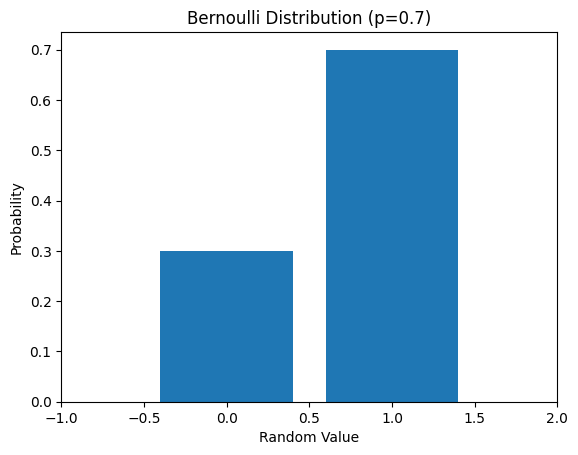

In [95]:
from scipy.stats import bernoulli

p=0.7

X = [0, 1]

plt.bar(X, bernoulli(p).pmf(X))
plt.xlim(-1, 2)
plt.title('Bernoulli Distribution (p=0.7)')
plt.xlabel('Random Value')
plt.ylabel('Probability')
plt.show()

The **Geometric distribution** expresses the probability distribution of a random variable X representing the number of Bernoulli trials k needed to get one success, where p is the probability of success in each trial.

$\displaystyle \textstyle p(k)=(1-p)^{k-1}p$

An example is tossing a coin until the first head appears. 

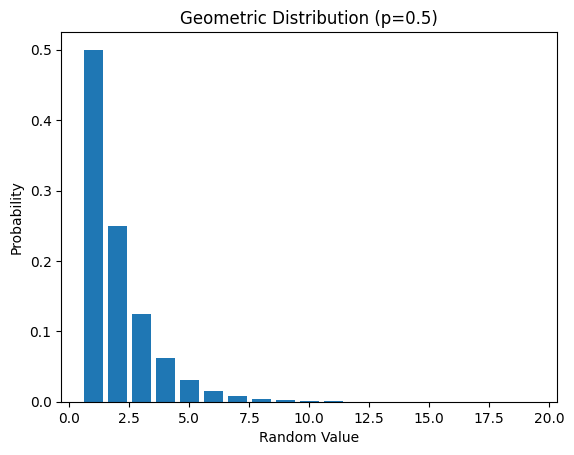

In [96]:
import numpy as np
from scipy.stats import geom

p = 0.5

X = np.arange(1, 20, 1)   
plt.bar(X, geom.pmf(X, p))
plt.title('Geometric Distribution (p=0.5)')
plt.xlabel('Random Value')
plt.ylabel('Probability') 
plt.show()

The **Binomial distribution** is the probability of a sequence of n experiments where each experiment produces a binary outcome and where each of the outcomes is independent of all the others. The single experiment is a Bernoulli random variable with probability p. Less formally, it can be thought of as a model for the set of possible outcomes of any single experiment that asks a yes–no question. The probability of getting k successes is:

$\displaystyle p(k) = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k}$

The formula can be understood as follows: k successes occur with probability $p^k$ and $(n - k)$ failures occur with probability $(1-p)^{n-k}$. However, the k successes can occur anywhere among the n trials, and there are $\frac{n!}{k!(n-k)!}$ different ways of distributing k successes in a sequence of n trials. 

Suppose a biased coin comes up heads with probability 0.3 when tossed. The probability of seeing exactly 4 heads in 6 tosses is

$\displaystyle p(4) = \frac{6!}{4!(6-4)!} 0.3^4 (1-0.3)^{6-4} = 0.0595$

In [97]:
from scipy.stats import binom
k=4
n=6
p=0.3

binom.pmf(k, n, p)

0.059535

This distribution is often used in social science statistics as a building block for models for dichotomous outcome variables, such as whether a Republican or Democrat will win an upcoming election, whether an individual will die within a specified period of time, etc. It also has applications in finance, banking, and insurance, among other industries.

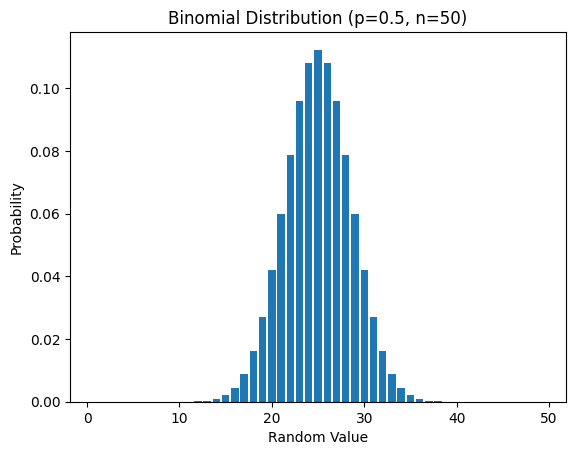

In [98]:
p = 0.5
n = 50

X = np.arange(1, 50, 1)   
plt.bar(X, binom.pmf(X, n, p)) 
plt.title('Binomial Distribution (p=0.5, n=50)')
plt.xlabel('Random Value')
plt.ylabel('Probability') 
plt.show()

### Continous Random Variables

A coin flip corresponds to a **discrete distribution**, one that associates positive probability with discrete outcomes. Often we’ll want to model distributions across a continuum of outcomes.  If a random variable X can take on any of a continuum of values, we **cannot define its probability mass function**, becouse we have infinite values and the probability of each individual point must necessarily be zero:

$\displaystyle P(X = x) = 0$ 

Instead we can define the **cumulative distribution function (cdf)** as a function of the continuous variable x that evaluate the probability that X will take a value less than or equal to x.

$\displaystyle F(x) = P(X < x)$

and the **probability density function (pdf)**. The concept is very similar to mass density in physics: its unit is probability per unit length:

$\displaystyle \rho (x)\,dx = P(X \in [x, x+dx]) = F(x+dx) - F(x)$ 

letting $dx \rightarrow 0$, we find

$\displaystyle \rho (x) = F'(x)$ 

$\displaystyle F(x) = \int_{- \infty}^{x} \rho (t)\,dt$

The total area under the pdf is always 1.0. This is just an intuitive derivation, for a more formal mathematical derivation, refere to probability or measure theory books.

The **uniform distribution** puts equal weight on all the numbers between a and b. Such a distribution describes an experiment where there is an arbitrary outcome that lies between certain bounds. The bounds are defined by the parameters a and  b, which are the minimum and maximum values. 
Its pdf and cdf are:

$\displaystyle \text{pdf}(x)={\begin{cases}{\frac {1}{b-a}}&{\text{for }}a\leq x\leq b\\[8pt]0&{\text{for }}x<a\ {\text{ or }}\ x>b\end{cases}}$

$\displaystyle \text{cdf}(x)={\begin{cases}0&{\text{for }}x<a\\[8pt]{\frac {x-a}{b-a}}&{\text{for }}a\leq x\leq b\\[8pt]1&{\text{for }}x>b.\end{cases}}$

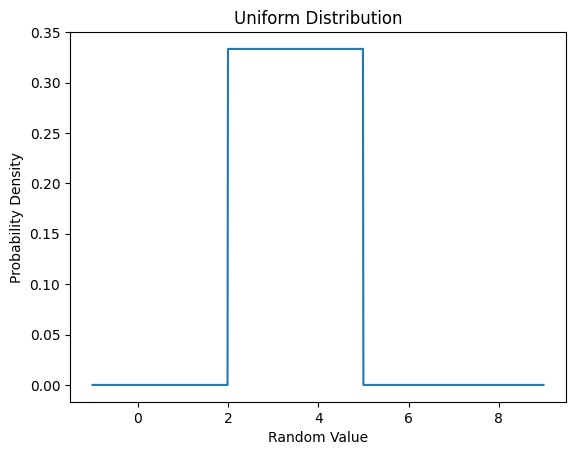

In [99]:
from scipy.stats import uniform
import numpy as np

a=2
b=5

x = np.arange(-1, 9, 0.01)
y = uniform.pdf(x, loc=a, scale=(b-a))
   
plt.plot(x, y) 
plt.title("Uniform Distribution")
plt.xlabel('Random Value')
plt.ylabel('Probability Density') 
plt.show()

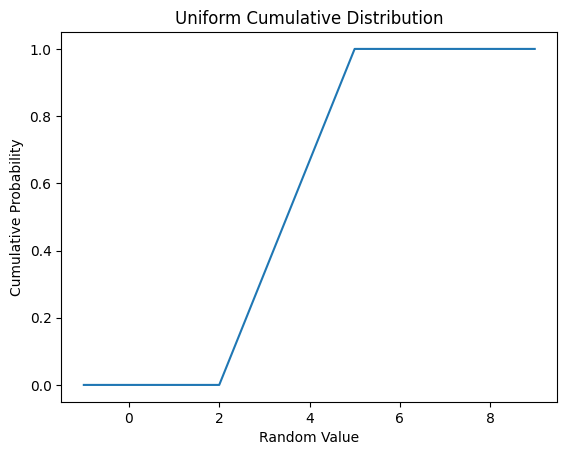

In [100]:
y = uniform.cdf(x, loc=a, scale=(b-a))
   
plt.plot(x, y) 
plt.title("Uniform Cumulative Distribution")
plt.xlabel('Random Value')
plt.ylabel('Cumulative Probability') 
plt.show()

The **normal distribution** is the classic bell curve–shaped distribution and is completely determined by two parameters: its **mean** $\mu$ and its **standard deviation** $\sigma$. The mean indicates where the bell is centered, and the standard deviation how wide it is. This distribution is important because physical quantities often have distributions that are nearly normal.

$\displaystyle \text{pdf}(x|\mu,\sigma) = \frac1{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

$\displaystyle \text{cdf}(x|\mu,\sigma) = {\frac {1}{2}}\left[1+ {\frac {2}{\sqrt {\pi }}}\int _{0}^{\left({\frac {x-\mu }{\sigma {\sqrt {2}}}}\right)}e^{-t^{2}}\,dt\right]$

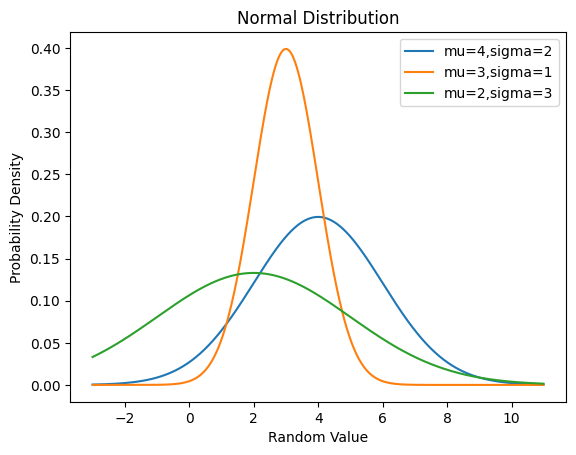

In [101]:
from scipy.stats import norm

sigma=[2, 1, 3]
mu=[4, 3, 2]

x = np.arange(-3, 11, 0.01)

plt.plot(x,[norm.pdf(value, mu[0], sigma[0]) for value in x],'-',label='mu=4,sigma=2')
plt.plot(x,[norm.pdf(value, mu[1], sigma[1]) for value in x],'-',label='mu=3,sigma=1')
plt.plot(x,[norm.pdf(value, mu[2], sigma[2]) for value in x],'-',label='mu=2,sigma=3')

plt.title("Normal Distribution")
plt.xlabel('Random Value')
plt.ylabel('Probability Density') 
plt.legend()
plt.show()

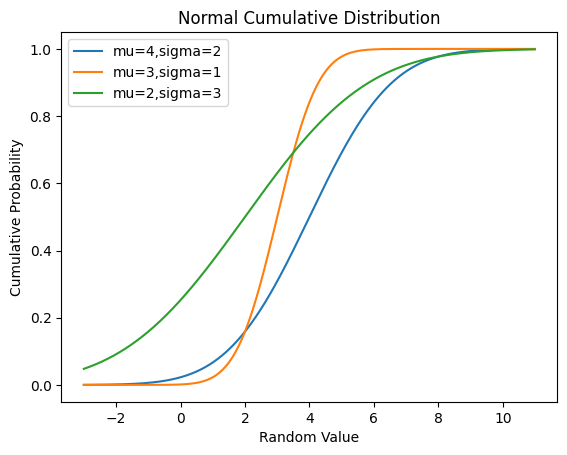

In [102]:
plt.plot(x,[norm.cdf(value, mu[0], sigma[0]) for value in x],'-',label='mu=4,sigma=2')
plt.plot(x,[norm.cdf(value, mu[1], sigma[1]) for value in x],'-',label='mu=3,sigma=1')
plt.plot(x,[norm.cdf(value, mu[2], sigma[2]) for value in x],'-',label='mu=2,sigma=3')

plt.title("Normal Cumulative Distribution")
plt.xlabel('Random Value')
plt.ylabel('Cumulative Probability') 
plt.legend()
plt.show()

When $\mu=0$ and $\sigma=1$, it’s called the **standard normal distribution**. If $Z$ is a standard normal random variable, then it turns out that:

$\displaystyle X = \sigma Z + \mu$

is also normal but with mean $\mu$ and standard deviation $\sigma$.

Conversely, if X is a normal random variable with mean $\mu$ and standard deviation $\sigma$

$\displaystyle Z = \frac{X - \mu}{\sigma}$

is a standard normal variable.

We can determine the probability of finding a given value in the distribution by using pdf and cdf. Let's say someone's got 227 Facebook friends. What is the probability of having this or less number of Facebook friends? We use a fictional data set of 10000 averge number of Facebook friends.

In [103]:
facebook_mu = 190.0
facebook_sigma = 36.0
facebook_friends = np.random.normal(facebook_mu, facebook_sigma, 10000)

First we take a look at the pdf and especially the area under the curve containing the probability of 227 Facebook friends or less:

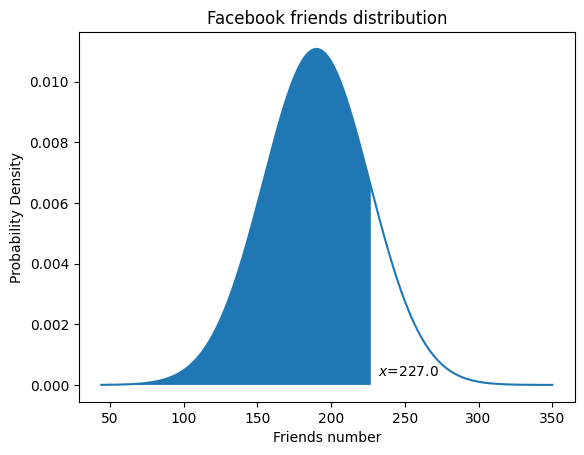

In [104]:
x = 227.0

x_plot = np.linspace(min(facebook_friends), 350, 1000)
y_plot = norm.pdf(x_plot, facebook_mu, facebook_sigma)
plt.plot(x_plot,  y_plot)
plt.fill_between(x_plot,  y_plot, where = x_plot < x)
plt.text(x+5, .0003, '$x$='+str(x))
plt.title("Facebook friends distribution")
plt.xlabel('Friends number')
plt.ylabel('Probability Density') 
plt.show()

And we can use cdf to evaluate the probability:

In [105]:
norm.cdf(227, facebook_mu, facebook_sigma)

0.8479728141176333

### Central Limit Theorem

If we take **large number n of samples** from any population with finite mean $\mu$ and standard deviation $\sigma$, then the distribution of the sample means X will follow the normal distribution regradless of the type of the original distribution.

![](images/stat-prob-central-theorem..png)

Also the mean of these sample means will be equal to the population mean and standard deviation of the sample means will decrease with increase in sample size:

$\displaystyle \mu_X=\mu$ 

$\displaystyle \sigma_X=\frac{\sigma}{\sqrt{n}}$   

In particular, if the population is normal, then the sample means will have a normal distribution independent of sample size; if the population is not normally distributed, but the sample size is big then the sampling distribution of the sample means approximates a normal distribution. To see the theorem in action, first let’s prepare a dataset of random values not normally distribuited:

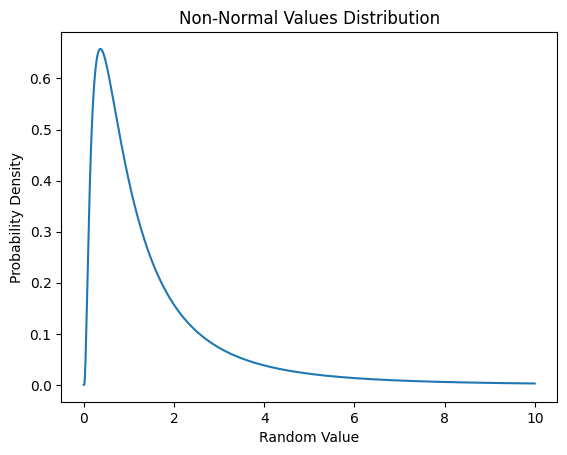

In [143]:
from scipy.stats import gibrat

x = np.arange(0, 10, 0.001)
y = gibrat.pdf(x)
plt.plot(x,  y)
plt.title('Non-Normal Values Distribution')
plt.xlabel('Random Value')
plt.ylabel('Probability Density')
plt.show()

In [152]:
print("Mean = ", y.mean())
print("Std = ", y.std())

Mean =  0.09893474926298237
Std =  0.1625800275001291


We can see that the distribution for these values does not represent a normal distribution: the shape is not symmetrical and the peak is skewed to the left with the majority of values lying within the right tail.

Now let’s pick some different sample sizes and create distribution plots of the sample means:

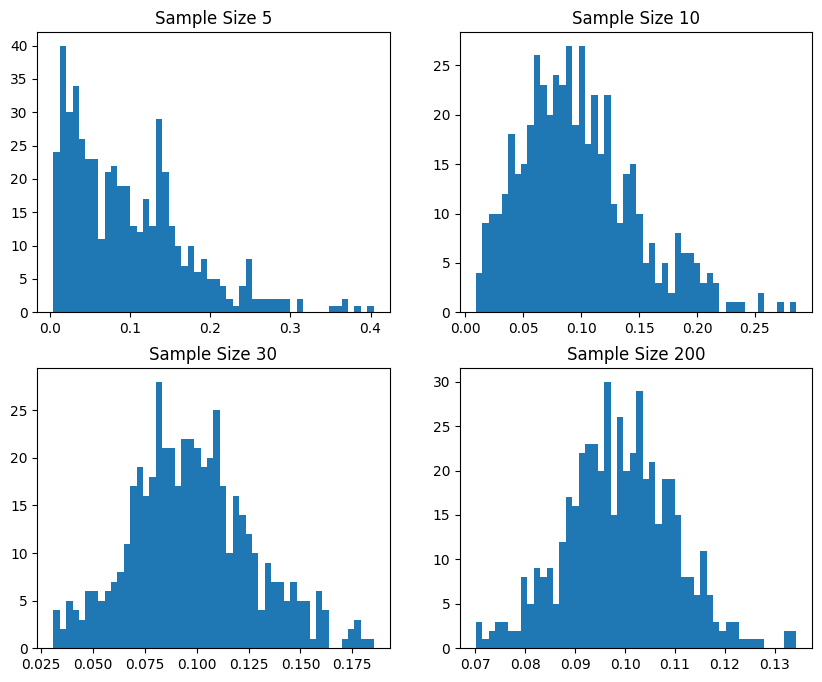

In [148]:
import pandas as pd

sample_sizes = [5, 10, 30, 200]

plt.figure(figsize=[10,8])
df_random = pd.Series(y)
for i, sample_size in enumerate(sample_sizes):
    sample_means = [df_random.sample(sample_size).mean() for i in range(500)]
    plt.subplot(2, 2, i+1) 
    plt.hist(sample_means,50)
    plt.title('Sample Size '+str(sample_size))

plt.show()

In [164]:
sample_means = pd.Series(sample_means)
print("Mean of sample means = ", sample_means.mean())
print("Std of sample means * sqrt(n) = ", sample_means.std() * np.sqrt(200))

Mean of sample means =  0.09897508254495367
Std of sample means * sqrt(n) =  0.15443094224357357


As we can see from the plots, the sample mean distribution becomes similar to a normal distribution as the sample size grows. We can use this result to says that as n gets large, a Binomial(n,p) variable is approximately a normal random variable. If we plot both, we can easily see the resemblance:

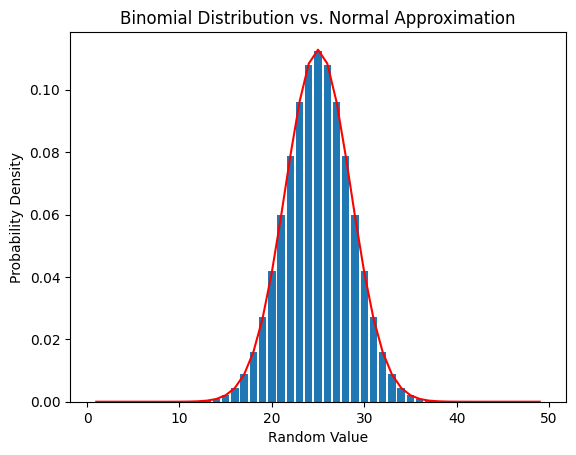

In [170]:
p = 0.5
n = 50

X = np.arange(1, 50, 1)   
plt.bar(X, binom.pmf(X, n, p)) 

mu = p * n
sigma = np.sqrt(n * p * (1 - p))
plt.plot(X, norm.pdf(X, mu, sigma), color="red")

plt.title("Binomial Distribution vs. Normal Approximation")
plt.xlabel('Random Value')
plt.ylabel('Probability Density') 

plt.show()

We can use the theorem for various purposes like the estimattion of the parameters of a population based on a sampled data, the collection of representative samples, the generalization of findings to the larger population, simulation base on Monte Carlo methods.

## Hypothesis and Inference

Using statistic and probability theory we can form and test **hypotheses** about our data and the processes that generate it. Hypotheses are assertions like “this coin is fair”, that can be translated into statistics about data. Under various assumptions, those statistics can be thought of as observations of random variables from known distributions, which allows us to make statements about **how likely those assumptions hold**. In the classical setup, we have a **null hypothesis** (often denoted $H_0$) which is the claim that **no relationship exists between two sets of data or variables** being analyzed. It assumes that any experimentally observed difference is due to chance and an underlying causative relationship does not exist (hence the term "null"). In addition to the null hypothesis, an alternative hypothesis ($H_1$) is also developed, which claims that a relationship does exist between two variables. We can apply statistics to decide whether we can reject the null hypothesis or not.

For example, imagine to have a coin and test whether it’s fair or not. We’ll make the assumption that the coin has some probability p of landing heads and our null hypothesis is that p=0.5 (coin is fair). We’ll test this against the alternative hypothesis p $\neq$ 0.5. In particular, our test will involve flipping the coin some number n of times and counting the number of heads X. Each coin flip is a Bernoulli trial, which means that X is a Binomial(n,p) random variable, which we can approximate using the normal distribution (thanks to the central limit theorem).

Let’s say that we choose to flip the coin n=1.000 times. If our hypothesis of fairness is true, X should be distributed approximately normally with:

Mean =  500.0
Std =  15.811388300841896


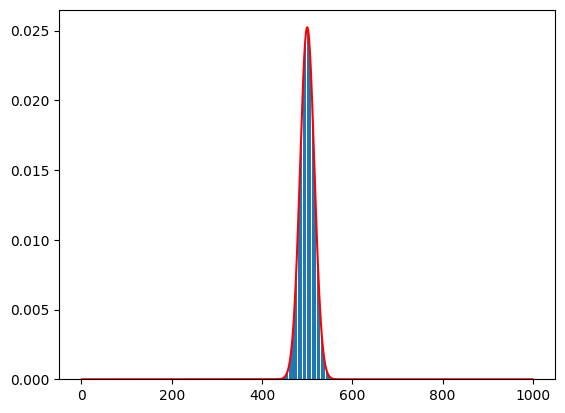

In [175]:
p = 0.5
n = 1000

X = np.arange(1, 1000, 1)   
plt.bar(X, binom.pmf(X, n, p)) 

mu = p * n
sigma = np.sqrt(n * p * (1 - p))

plt.plot(X, norm.pdf(X, mu, sigma), color="red")

print("Mean = ", mu)
print("Std = ", sigma)

Whenever a random variable follows a normal distribution, we can use normal distribution to figure out the probability that its realized value lies within or outside a particular interval, or we can do the reverse, find the interval that accounts for a certain level of likelihood. For example, if we want to find an interval centered at the mean and containing 60% probability (**confidence**), then we find the cutoffs where the upper and lower tails each contain 20% of the probability (leaving 60%).
We need to make a decision about **significance**: how willing we are to make a **false positive** error, in which we reject $H_0$ even though it’s true? For historical reasons, in general this willingness is often set at 5% or 1%:

![](images/stat-prob-significance.png)

In our example:

In [181]:
lower_bound, upper_bound = norm.interval(0.95, loc=mu, scale=sigma)

print("lower bound = ", lower_bound)
print("upper bound = ", upper_bound)

lower bound =  469.0102483847719
upper bound =  530.9897516152281


In other words, assuming p really equals 0.5 ($H_0$ is true), there is just a 5% chance that we observe an X that lies outside this interval.

We are also often interested in the **power** of a test, which is the probability of not making **false negative** errors, in which we fail to reject $H_0$ even though it’s false. Or, in other words, it is the chances of a true positive detection conditional on the actual existence of an effect to detect. 

![](images/stat-prob-test-power.png)

In the example, let’s check what happens if the real p of the coin is 0.55, so that the coin is slightly biased toward heads. In that case, we can calculate the power of the test with:

In [182]:
p = 0.55
n = 1000

X = np.arange(1, 1000, 1)   
mu_real = p * n
sigma_real = np.sqrt(n * p * (1 - p))

print("Mean real = ", mu_real)
print("Std real = ", sigma_real)

Mean real =  550.0
Std real =  15.732132722552272


False negative error means we fail to reject the null hypothesis which will happen when X is still in our original interval:

In [186]:
power = 1 - norm.cdf(upper_bound, mu_real, sigma_real)

print("power = ", power)

power =  0.8865476494917938


An alternative way of thinking about the preceding test involves **p-values**, which is a measure of the probability that an observed value could have occurred just by random chance. The lower the p-value, the greater the statistical significance of the observed value. We can define it as the probability of obtaining results **at least as extreme as the observed result**, assuming that the null hypothesis is correct.

![](images/stat-prob-p-value.png)

For example, if we were to see 520 heads, we would compute:

In [196]:
1 - norm.cdf(519.5, mu, sigma)

0.10873411307177117

We use a value of 519.5 rather than using 520. This is what’s called a **continuity correction**. It reflects the fact that normal probability between (519.5, 520.5) is a better estimate of the probability of seeing 520 heads than normal probability between (520, 521) is. Correspondingly normal probability above (519.5) is a better estimate of the probability of seeing at least 520 heads.

If the p-value is less than or equal to the specified significance level, the null hypothesis is rejected; otherwise, the null hypothesis is not rejected. Thus, the p-value is commonly used to evaluate the strength of the evidence against the null hypothesis without reference to the significance level:

- $\displaystyle p > 0.1$ : weak or no evidence against 
- $\displaystyle 0.05 < p < 0.1$ : moderate evidence 
- $\displaystyle 0.01 < p < 0.05$ : strong evidence 
- $\displaystyle p < 0.01$ : very strong evidence 

Since the p-value is greater than our 5% significance, we don’t reject the null-hypothesys. If we instead saw 530 heads, the p-value would be:

In [198]:
1 - norm.cdf(529.5, mu, sigma)

0.031038607897994175

which is smaller than the 5% significance, which means we would reject the null.

If you’re setting out to find "significant" results, you usually can. Test enough hypotheses against your dataset, and one of them will almost certainly appear significant. For example, we can repeat and experiment (flipping a coin 1000 times) several times until we find something significant:

In [200]:
import random

def run_experiment() -> List[bool]:
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment):
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment for experiment in experiments if reject_fairness(experiment)])

print(num_rejections)

37



This is called **p-hacking**. If you want to do good science, you should **determine your hypotheses before looking at the data**, you should clean your data without the hypotheses in mind, and you should keep in mind that p-values are not substitutes for common sense. A good article criticizing this approach is [J. Cohen, **The Earth Is Round**](https://psycnet.apa.org/doiLanding?doi=10.1037%2F0003-066X.49.12.997).

